# Часть I: о теорема Байеса

1) Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови! Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить

**Решение:**

Рассмотрим два события:
* B = {человек имеет группы крови Х убийцы}
* K = {человек совершил убийство}

Прокурор прав, что $P(B | \lnot K) = P(B) = 0.01$, тк если человек не совершал убийство, то вероятность иметь группу крови такая же как для популяции в целом.

Однако далее вместо оценки $P(K | B)$ прокурор оценил $P(\lnot B | \lnot K) = P(\lnot B) = 0.99$, хотя требовалось воспользоваться теоремой Байеса

2) Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?

**Решение:**

Адвокат утверждает, что $P(K | B) = P(B) = 0.01$, но на самом деле:

$$P(K | B) = \frac{P(B | K) P(B)}{P(K)} = \frac{P(B)}{P(K)} \geq P(B)$$

тк в условии указано, что $P(B | K) = 1$. Причем равенство достигается только при P(K) = 1, а иначе строго больше P(B)


3) Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
from sklearn import linear_model, metrics

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16

In [2]:
## если data = 1, тест положительный
def compute_posterior(data, prior_prob=0.01, test_fp = 0.05, test_fn = 0.05):
    p_t = (prior_prob * (1. - test_fn) + (1-prior_prob) * test_fp)
    if data == 1:
        return (prior_prob * (1. - test_fn)) / p_t
    elif data == 0:
        return (prior_prob * test_fn) / (1. - p_t)
    else:
        return None

def show(xs, ys_zero, ys_one, xlabel_str, xmin, xmax):
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(xs, ys_one, linewidth=2, label=r'Вероятность после положительного теста')
    ax.plot(xs, ys_zero, linewidth=2, label=r'Вероятность после отрицательного теста')
    ax.set_xlim((xmin, xmax))
    ax.set_xlabel(xlabel_str, fontsize=legend_fontsize)
    ax.legend(fontsize=legend_fontsize)
    plt.show()

vector_posterior = np.vectorize(compute_posterior, excluded=['data', 'test_fp', 'test_fn'])
print("Апостериорная вероятность после положительного теста: %.6f" % compute_posterior(1) )
print("Апостериорная вероятность после отрицательного теста: %.6f" % compute_posterior(0) )

Апостериорная вероятность после положительного теста: 0.161017
Апостериорная вероятность после отрицательного теста: 0.000531


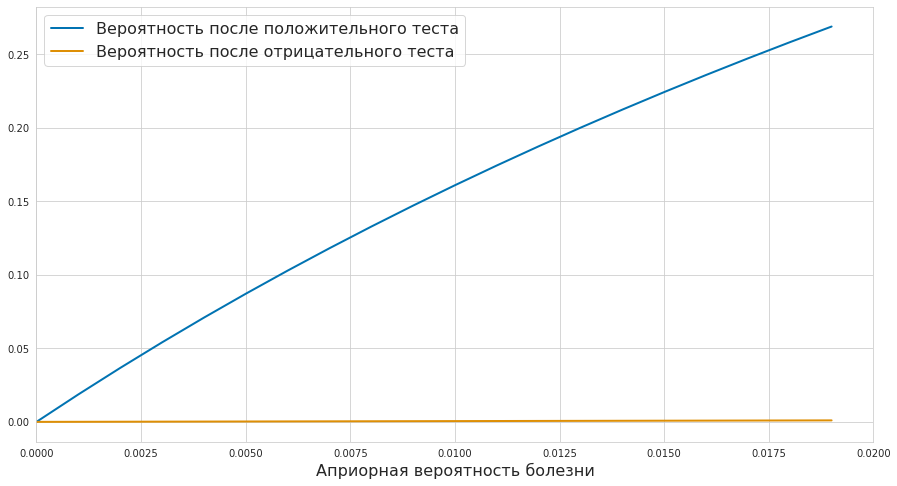

In [3]:
xs = np.arange(0, 0.02, 0.001)
ys_one = vector_posterior(1, prior_prob=xs)
ys_zero = vector_posterior(0, prior_prob=xs)
show(xs, ys_zero, ys_one, xlabel_str='Априорная вероятность болезни', xmin=0, xmax=0.02)

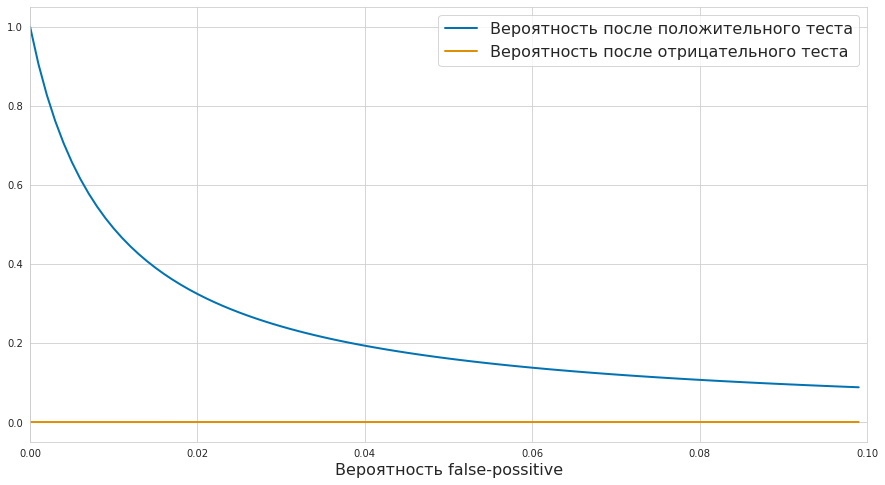

In [4]:
xs = np.arange(0, 0.10, 0.001)
ys_one = vector_posterior(1, test_fp=xs)
ys_zero = vector_posterior(0, test_fp=xs)
show(xs, ys_zero, ys_one, xlabel_str='Вероятность false-possitive', xmin=0, xmax=0.1)

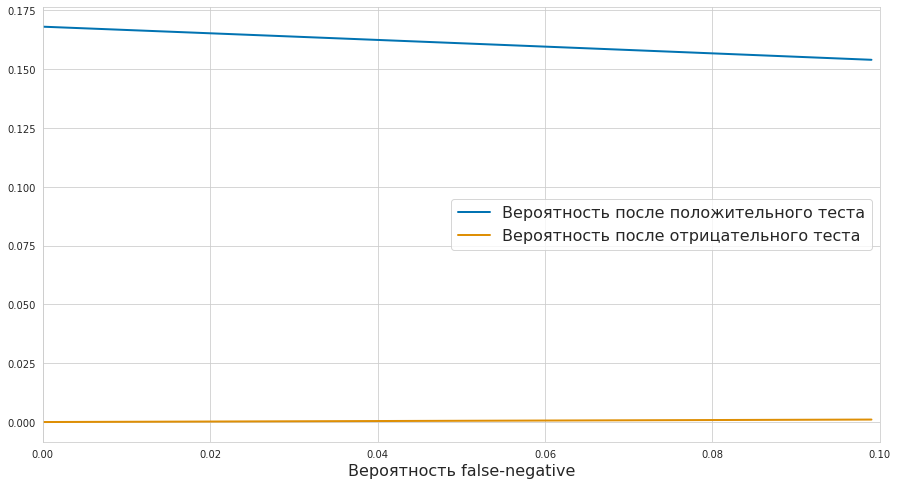

In [5]:
xs = np.arange(0, 0.10, 0.001)
ys_one = vector_posterior(1, test_fn=xs)
ys_zero = vector_posterior(0, test_fn=xs)
show(xs, ys_zero, ys_one, xlabel_str='Вероятность false-negative', xmin=0, xmax=0.1)

**Решение:**

Достаточно сосредоточиться на уменьшении вероятности false-possitive, тк эта величина существенно влияет на результирующую $P(d=1|t=1)$ в отличие от false-negative, а величина $P(d=1|t=0)$ и так мала.

# Часть II: о линейной регрессии

1) Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.

In [37]:
import pandas as pd

df = pd.read_csv('owid-covid-data.csv')
df = df.query("iso_code == \'RUS\' & date >= \'2020-03-03\'")
df.index = np.arange(0, len(df), 1)
df.new_cases[df.new_cases <= 0] = 1
df_train, df_test = df[:50], df[50:]

print(df_test.columns)
print("train shape:", df_train.shape)
print("test shape:", df_test.shape)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

2) Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.

>a) Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

>b) Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

>c) Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).


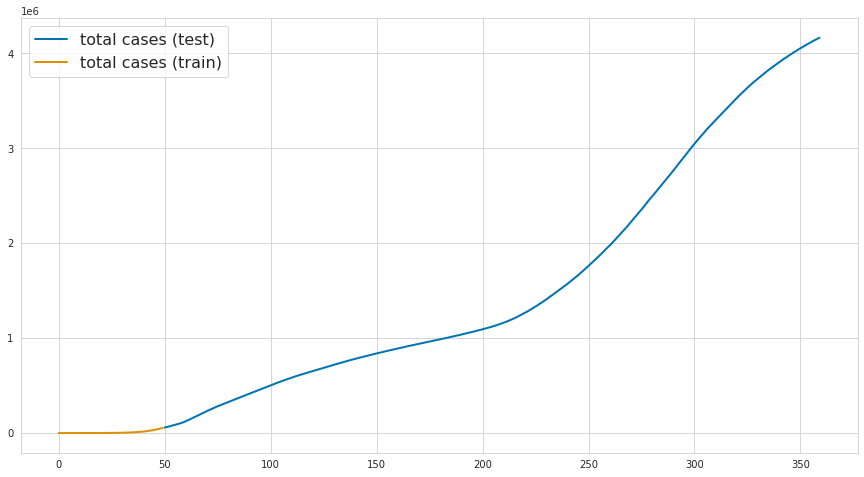

In [38]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(df_test.total_cases, linewidth=2, label='total cases (test)')
ax.plot(df_train.total_cases, linewidth=2, label='total cases (train)')
ax.legend(fontsize=legend_fontsize)
plt.show()

In [60]:
def get_data(df):
    # x = (day)
    x = df.index.to_numpy().reshape(-1, 1)
    y = np.log(df.total_cases)
    return x, y

x_train, y_train = get_data(df_train)
x_full, y_full = get_data(df)

model = linear_model.Ridge(fit_intercept=True).fit(x_train, y_train)
print(model.coef_)

model_total_cases_train = np.exp(model.predict(x_train))
model_total_cases_full = np.exp(model.predict(x_full))

print(f'train accuracy: {model.score(x_train, y_train):.3f}')
print(f'test accuracy: {model.score(x_full, y_full):.3f}')

[0.19827187]
train accuracy: 0.985
test accuracy: -113.185


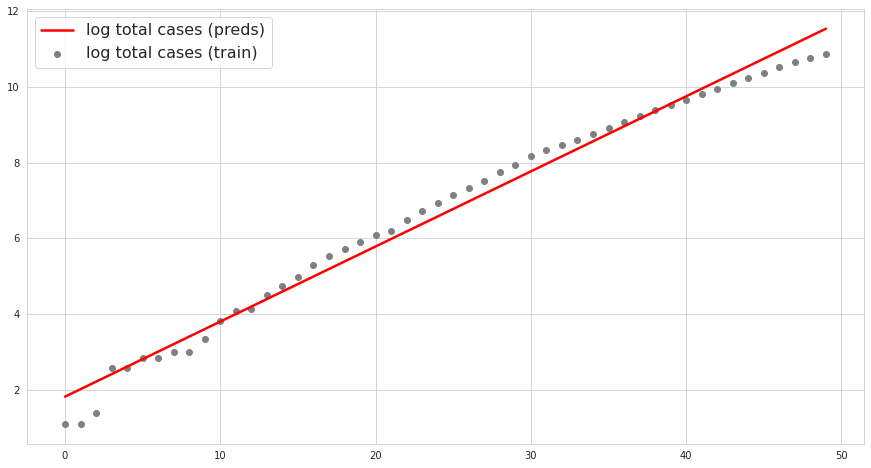

In [61]:
fig, ax = plt.subplots(figsize=figsize)
#ax.scatter(df_test.index, np.log(df_test.total_cases), color='blue', label='log total cases (test)')
ax.scatter(df_train.index, np.log(df_train.total_cases), color='grey', label='log total cases (train)')
ax.plot(np.log(model_total_cases_train), linewidth=2.5, color='red', label='log total cases (preds)')
ax.legend(fontsize=legend_fontsize)
plt.show()

In [62]:
def get_sigma_noise(y, y_pred):
    return np.std(y - y_pred)

def bayesian_update(mu, sigma, x, y, sigma_noise=.25):
    x_matrix = np.concatenate((np.ones((len(x), 1)), x), axis=1)
    sigma_n = np.linalg.inv(np.linalg.inv(sigma) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), y ) )
    return mu_n, sigma_n

x = x_train
y = y_train
y_pred = model.predict(x)
sigma_noise = get_sigma_noise(y, y_pred)
print("sigma_noise =", sigma_noise)

mu_0, sigma_0 = np.array([0, 0]), 2*np.array([[1, 0], [0, 1]])
mu, sigma = bayesian_update(mu_0, sigma_0, x, y, sigma_noise)
print("mu =", mu)
print("sigma =", sigma)

sigma_noise = 0.3490423141291704
mu = [1.81219413 0.19854949]
sigma = [[ 9.41520907e-03 -2.85308936e-04]
 [-2.85308936e-04  1.16594502e-05]]


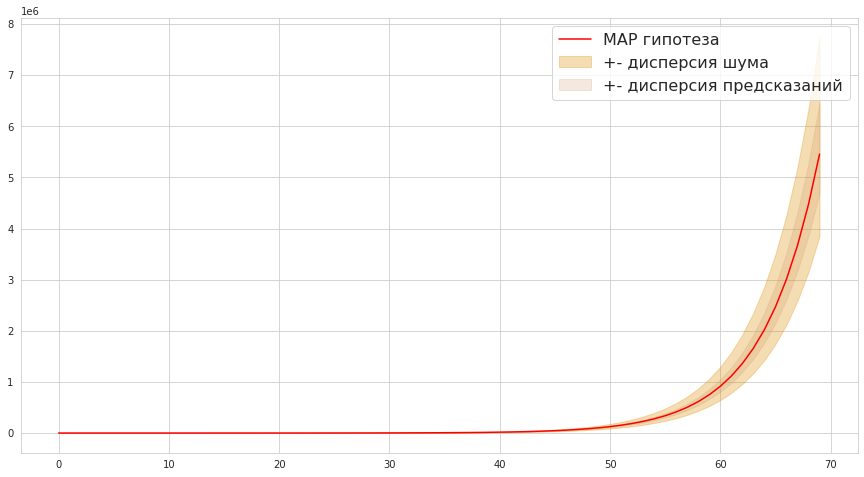

In [63]:
# Посэмплируем прямые и выдадим статистики по предсказаниям
def sample_statistics(mu, sigma, xs, n=20):
    xs = xs.reshape(xs.shape[0],)
    my_w = np.random.multivariate_normal(mu, sigma, n)
    res = np.zeros((n, xs.shape[0]))
    for i,w in enumerate(my_w):
        res[i,:] = w[0] + w[1]*xs
    return res

# helpers
def compute_map(xs, mu):
    return np.exp(mu[1]*xs + mu[0])

def compute_map_with_sigma_noise(xs, mu, noise):
    return np.exp(mu[1]*xs + mu[0] - noise), np.exp(mu[1]*xs + mu[0] + noise)

def compute_map_with_sigma_preds(y_stats):
    return np.exp(np.mean(y_stats, axis=0) - np.std(y_stats, axis=0)), np.exp(np.mean(y_stats, axis=0) + np.std(y_stats, axis=0))

# Нарисуем результат
def plot_predictions(xs, mu, sigma, sigma_noise):
    y_pred_stats = sample_statistics(mu, sigma, xs, n=1000)
    xs = xs.reshape(xs.shape[0],)
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(xs, compute_map(xs, mu), color="red", label="MAP гипотеза")
    
    loy, hiy = compute_map_with_sigma_noise(xs, mu, sigma_noise)
    ax.fill_between(xs, loy, hiy, color=palette[1], alpha=.3, label="+- дисперсия шума")
    
    loy, hiy = compute_map_with_sigma_preds(y_pred_stats)
    ax.fill_between(xs, loy, hiy, color=palette[5], alpha=.2, label="+- дисперсия предсказаний")
    ax.legend(fontsize=legend_fontsize)

plot_predictions(x_full[:70], mu, sigma, sigma_noise)

In [64]:
def pred_distr(mu, sigma, sigma_noise, date_str):
    x_date = np.array([(df[df.date == date_str].index)])
    print("Predictions for ", date_str)
    print("\nMAP", compute_map(x_date, mu))
    print("+- sigma noise interval", compute_map_with_sigma_noise(x_date, mu, sigma_noise))
    y_pred_stats = sample_statistics(mu, sigma, x_date, n=1000)
    print("+- sigma preds interval", compute_map_with_sigma_preds(y_pred_stats))

In [65]:
pred_distr(mu, sigma, sigma_noise, '2020-05-01')

Predictions for  2020-05-01

MAP [[749089.83211691]]
+- sigma noise interval (array([[528380.46309814]]), array([[1061991.53029001]]))
+- sigma preds interval (array([652835.24153415]), array([847827.11543989]))


In [66]:
pred_distr(mu, sigma, sigma_noise, '2020-06-01')

Predictions for  2020-06-01

MAP [[3.52883476e+08]]
+- sigma noise interval (array([[2.48911047e+08]]), array([[5.00286142e+08]]))
+- sigma preds interval (array([2.82798232e+08]), array([4.43722617e+08]))


In [67]:
pred_distr(mu, sigma, sigma_noise, '2020-09-01')

Predictions for  2020-09-01

MAP [[3.02478586e+16]]
+- sigma noise interval (array([[2.13357288e+16]]), array([[4.28826667e+16]]))
+- sigma preds interval (array([1.7763848e+16]), array([5.14631906e+16]))


3) Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана

Естественно, в нашем случае сигмоида стремится не к единице, т.е. константа перед интегралом может быть произвольной (и её можно внести в экспоненту), а в экспоненте под интегралом может быть произвольная квадратичная функция от t.

a) Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.

b) Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.

c) Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России? Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа случаев)? В оптимистичном сценарии (10-й процентиль)?


In [68]:
# y = w0 exp (w1*x + w2*x**2) <=> log(y) = w'0 + w1*x + w2*x**2
# y ~ new cases, cumsum(y) ~ total cases

def get_data(df):
    # x = (day, day^2)
    x = df.index.to_numpy().reshape(-1, 1)
    x = np.concatenate((x, x * x), axis=1)
    # target = log(new cases)
    y = np.log(df.new_cases)
    return x, y

x_train, y_train = get_data(df_train)
x_full, y_full = get_data(df)

model = linear_model.Ridge(fit_intercept=True).fit(x_train, y_train)
print(model.coef_)

model_total_cases_train = np.cumsum(np.exp(model.predict(x_train)))
model_total_cases_full = np.cumsum(np.exp(model.predict(x_full)))

print(f'train accuracy: {model.score(x_train, y_train):.3f}')
print(f'test accuracy: {model.score(x_full, y_full):.3f}')

[ 0.27521497 -0.00182201]
train accuracy: 0.968
test accuracy: -910.352


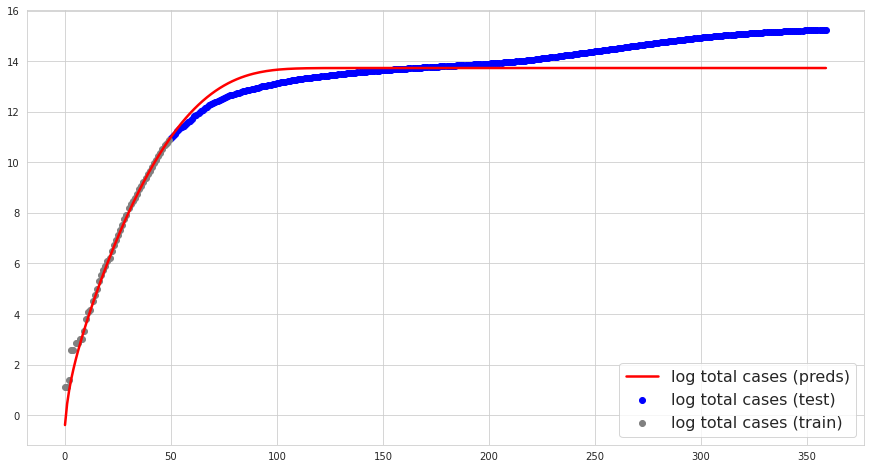

In [69]:
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(df_test.index, np.log(df_test.total_cases), color='blue', label='log total cases (test)')
ax.scatter(df_train.index, np.log(df_train.total_cases), color='grey', label='log total cases (train)')
ax.plot(np.log(model_total_cases_full), linewidth=2.5, color='red', label='log total cases (preds)')
ax.legend(fontsize=legend_fontsize)
plt.show()

In [70]:
x, y = x_train, y_train
y_pred = model.predict(x)
sigma_noise = get_sigma_noise(y, y_pred)
print("sigma_noise =", sigma_noise)

mu_0, sigma_0 = np.array([0, 0, 0]), 2*np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
mu, sigma = bayesian_update(mu_0, sigma_0, x, y, sigma_noise)
print("mu =", mu)
print("sigma =", sigma)

sigma_noise = 0.4891718374380322
mu = [-0.38841833  0.27494955 -0.00181835]
sigma = [[ 3.90204930e-02 -3.15248562e-03  5.30708901e-05]
 [-3.15248562e-03  3.49444151e-04 -6.68070813e-06]
 [ 5.30708901e-05 -6.68070813e-06  1.36647454e-07]]


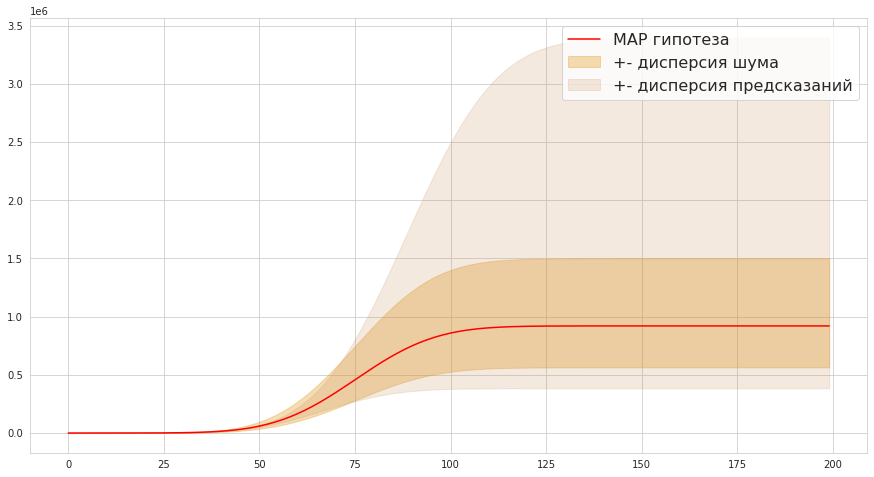

In [76]:
# Посэмплируем прямые и выдадим статистики по предсказаниям
def sample_statistics(mu, sigma, xs, n=20):
    xs = xs.reshape(xs.shape[0],)
    my_w = np.random.multivariate_normal(mu, sigma, n)
    res = np.zeros((n, xs.shape[0]))
    for i,w in enumerate(my_w):
        res[i,:] = w[0] + w[1]*xs + w[2]*xs*xs
    return res

# helpers
def compute_map(xs, mu, delta=0):
    return np.cumsum(np.exp(mu[2]*xs*xs + mu[1]*xs + mu[0] + delta))

def compute_map_with_sigma_noise(xs, mu, noise):
    return compute_map(xs, mu, -noise), compute_map(xs, mu, +noise)

def compute_map_with_sigma_preds(y_stats):
    return np.cumsum(np.exp(np.mean(y_stats, axis=0) - np.std(y_stats, axis=0))), np.cumsum(np.exp(np.mean(y_stats, axis=0) + np.std(y_stats, axis=0)))

# Нарисуем результат
def plot_predictions(xs, mu, sigma, sigma_noise):
    y_pred_stats = sample_statistics(mu, sigma, xs, n=1000)
    xs = xs.reshape(xs.shape[0],)
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(xs, compute_map(xs, mu), color="red", label="MAP гипотеза")
    
    loy, hiy = compute_map_with_sigma_noise(xs, mu, sigma_noise)
    ax.fill_between(xs, loy, hiy, color=palette[1], alpha=.3, label="+- дисперсия шума")
    
    loy, hiy = compute_map_with_sigma_preds(y_pred_stats)
    ax.fill_between(xs, loy, hiy, color=palette[5], alpha=.2, label="+- дисперсия предсказаний")
    ax.legend(fontsize=legend_fontsize)

x = df.index.to_numpy().reshape(-1, 1)
plot_predictions(x[:200], mu, sigma, sigma_noise)